# Lending Club Case Study
In this project we are going to utilise EDA to find risky and profitable customers for a lending company, which is a large online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures through an online platform.

 Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the loan.csv file into a pandas dataframe.

In [3]:
df = pd.read_csv(r"C:\Users\rsach\OneDrive\Desktop\AI & ML\2. Data Visualisation & EDA\Lending Club Case study\loan\loan.csv")

C:\Users\rsach\AppData\Local\Temp\ipykernel_33964\1328992082.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rsach\OneDrive\Desktop\AI & ML\2. Data Visualisation & EDA\Lending Club Case study\loan\loan.csv")


Exploring sample data in the dataset.

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
cols = df.columns
df1 = df

In [8]:
columns_to_drop = []
for i in cols:
    if df[i].isnull().all():
        columns_to_drop.append(i)

df1 = df.drop(columns = columns_to_drop )
df1.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
df1.shape

(39717, 57)

We can drop the columns emp_title, emp_length, desc, title, mths_since_last_delinq, mths_since_last_record, next_pymnt_d as these factors may not contribute to the final outcome and are missing lot of values.

In [10]:
df2 = df1.drop(columns = ["emp_title", "emp_length", "desc", "title", "mths_since_last_delinq","mths_since_last_record", "next_pymnt_d" ])

In [11]:
df2.shape

(39717, 50)

In [12]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
df2.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc                       0
initial_list_s

#### Now datatypes of the values has to be checked and corrected.

Data type of term column has to be changed from object to int.

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [15]:
df2["term"] = df2["term"].apply(lambda x : int(x.replace("months", "")))

In [16]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Data type of int_rate has to be changed to float

In [17]:
df2["int_rate"] = df2["int_rate"].apply(lambda x: float(x.replace("%","")))

In [18]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Data type of issue_d has to be changed to date format

In [19]:
df2["issue_d"] = pd.to_datetime(df2["issue_d"], format='%b-%y', errors='coerce')

In [20]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int64         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

Check whether zip_code is suitable for categorisation

In [22]:
df2["zip_code"].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [23]:
df2.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

Columns Zip_code and url can be dropped as these columns doesnt provide any insights

In [24]:
df2  = df2.drop(columns=["zip_code", "url"])

In [25]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [95]:
df3 = df2.copy()

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int64         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

<function matplotlib.pyplot.show(close=None, block=None)>

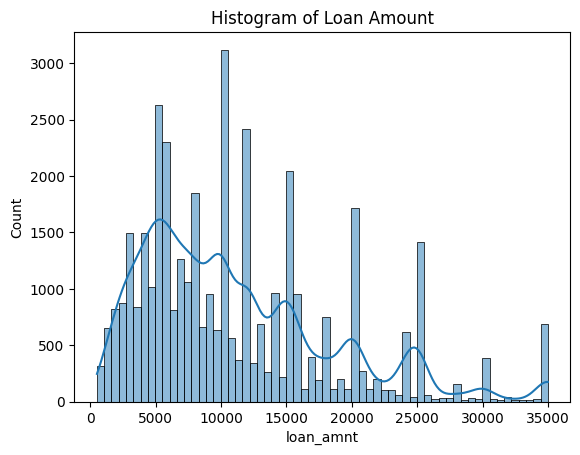

In [85]:
# Histogram - Loan Amount
sns.histplot(df3['loan_amnt'].dropna(), kde=True)
plt.title('Histogram of Loan Amount')
plt.show

- Most Common Loan Amounts: The histogram shows that loan amounts around 10,000 to 15,000 are the most common, as indicated by the peak in the bar heights and the density curve. This suggests that a significant number of loans fall within this range.

- Distribution Shape: The distribution is right-skewed, meaning that there are more loans with lower amounts, and as the loan amount increases, the number of loans decreases. This is typical for financial data, where a larger number of smaller loans are more common than larger ones.

- Outliers: There are some bars and points in the histogram and KDE curve towards higher loan amounts (20,000 to 30,000) indicating that while less common, some loans are given at these higher amounts.

Drop annual income greater than 500000 as these are rare values.

In [96]:
df3 = df3[df3["annual_inc"]<500000]

In [97]:
df3['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

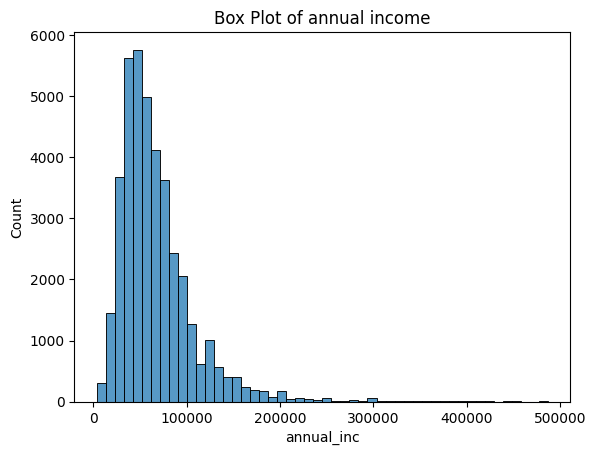

In [98]:

sns.histplot(x=df3['annual_inc'],bins=50)
plt.title('Box Plot of annual income')
plt.show()

Annual income of majority of population is coming around 50000.

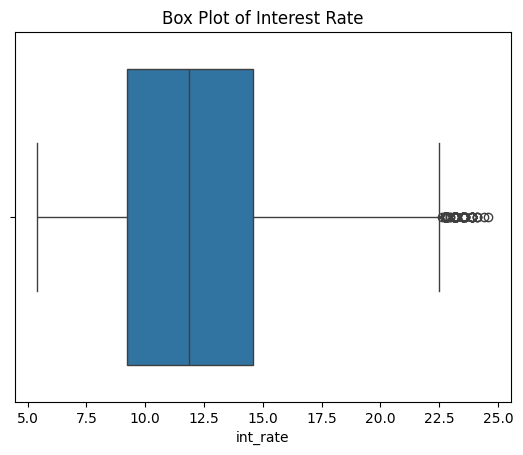

In [29]:

sns.boxplot(x=df3['int_rate'])
plt.title('Box Plot of Interest Rate')
plt.show()

- Median Interest Rate: The median interest rate (the line inside the box) is around 12%. This indicates that half of the loans have an interest rate above 12%, and half have an interest rate below 12%.

- Interquartile Range (IQR): The IQR is between approximately 9% and 15%. This range captures the middle 50% of interest rates, indicating that most loans have interest rates within this range.

- Whiskers and Outliers: The whiskers extend from about 6% to just above 20%, showing the spread of the data. There are a few outliers on the higher end, above 20%, indicating that some loans have interest rates higher than the typical range.

- Skewness: The box plot is slightly skewed to the right, meaning there is a longer tail on the higher end of the interest rates. This suggests that while most interest rates are clustered within the lower range, there are some loans with significantly higher interest rates.

<function matplotlib.pyplot.show(close=None, block=None)>

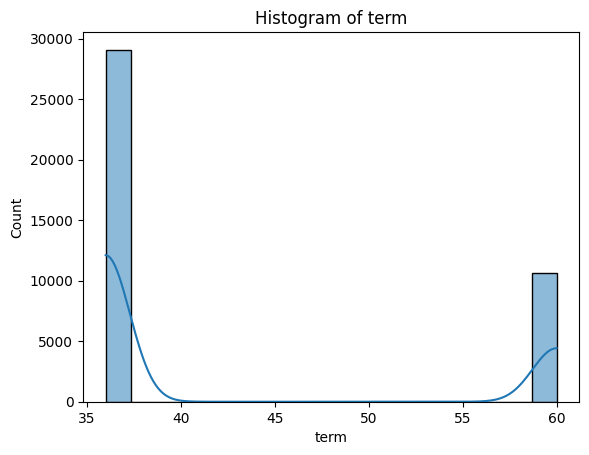

In [30]:
sns.histplot(df3['term'].dropna(), kde=True)
plt.title('Histogram of term')
plt.show

- The term of loan data is concentrated mostly at 35 to 40 months and 55 to 60 months.
- The data suggests that customers prefer 35 to 40 months term mostly.


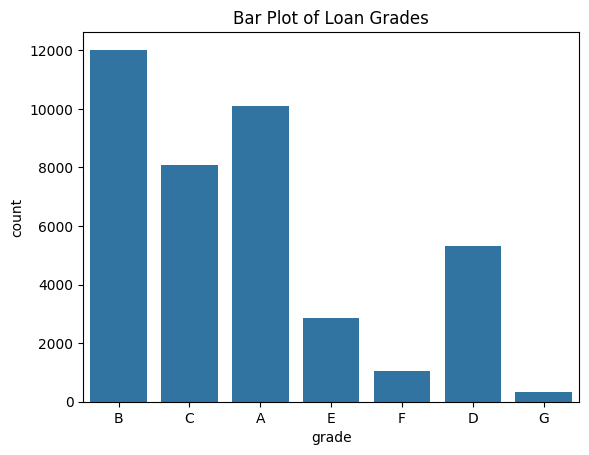

In [31]:
sns.countplot(x=df3['grade'])
plt.title('Bar Plot of Loan Grades')
plt.show()


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int64         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

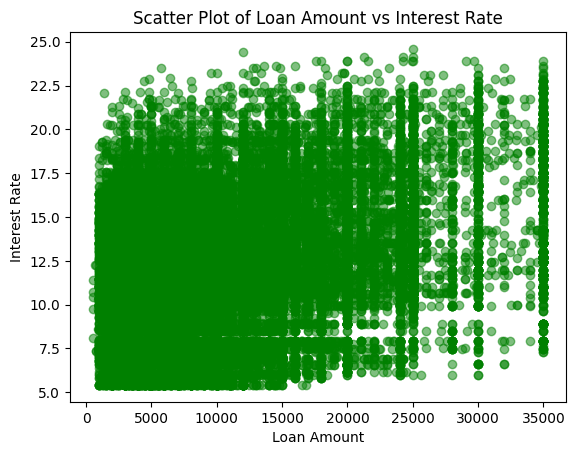

In [33]:
# Scatter Plot - Loan Amount vs Interest Rate
plt.subplot(1, 1, 1)
plt.scatter(df3['loan_amnt'], df3['int_rate'],alpha = 0.5,color = 'green' )
plt.title('Scatter Plot of Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')

# Adjusting layout

plt.show()

#### Density of Data Points:

The scatter plot shows a dense cluster of points, especially at the lower loan amounts (below 20,000), suggesting that a large number of loans have lower amounts.
The density of points decreases as the loan amount increases, particularly beyond 20,000. However, there are still some loans with higher amounts.

#### Interest Rate Distribution:

The interest rates are spread across the range of 5% to 25%, but a significant portion of the loans have interest rates between 10% and 20%.
There is no clear trend that suggests a strong relationship between loan amount and interest rate. Instead, interest rates appear to be fairly distributed across different loan amounts, with no clear increase or decrease as loan amounts rise.

#### Outliers:

There are a few outliers where the loan amounts are high (close to 35,000) but have varying interest rates.
Some high-interest rates are associated with both low and high loan amounts, indicating that the interest rate is not solely dependent on the loan amount.

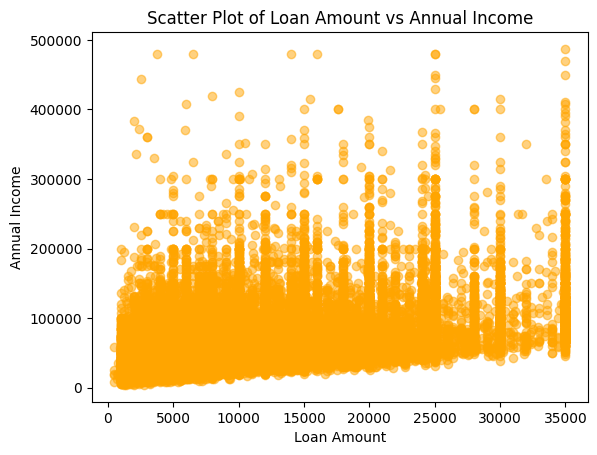

In [102]:
# Scatter Plot - Loan Amount vs Annual income
plt.subplot(1, 1, 1)
plt.scatter(df3['loan_amnt'], df3['annual_inc'],alpha = 0.5,c = 'orange' )
plt.title('Scatter Plot of Loan Amount vs Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')

# Adjusting layout

plt.show()

- There is a strong positive trend showing loan amoount increases with increase in annual income
- There are fewer nummbers of higher annual income category availing lower loan amounts.

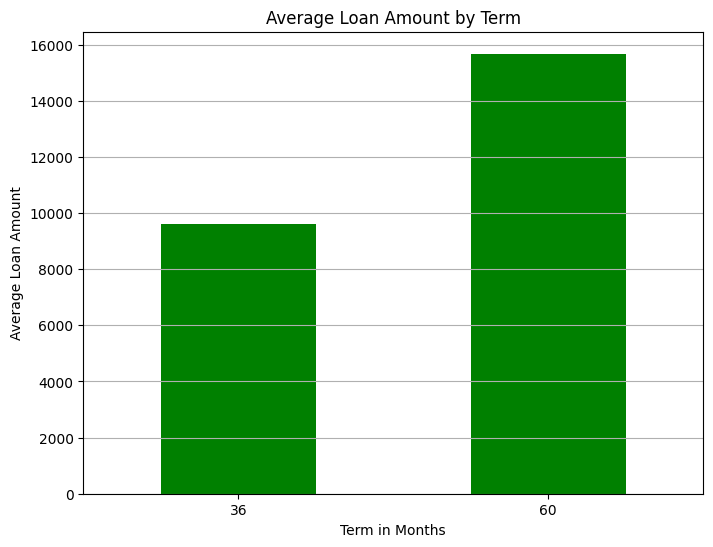

In [34]:
# Loan Amount vs term
df3['term'] = df3['term'].astype(str)

average_loan = df3.groupby('term')['loan_amnt'].mean()

plt.figure(figsize=(8, 6))
average_loan.plot(kind='bar', color='green')
plt.title('Average Loan Amount by Term')
plt.xlabel('Term in Months')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- For average loan amount of 8000 to 10000 the repayment term opted was 36 months
- For average loan amount of 14000 to 16000 the repayment term opted was 60 months

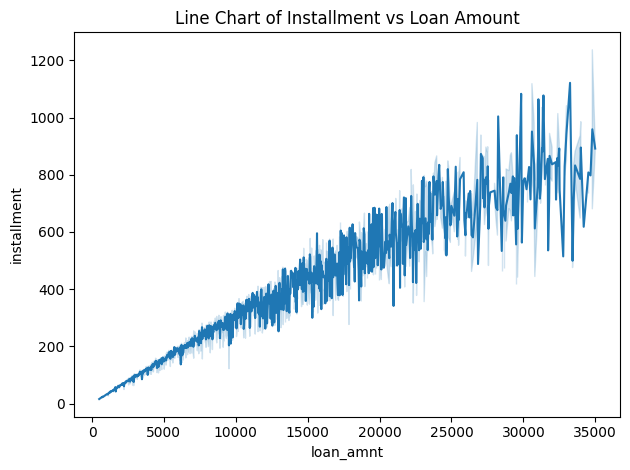

In [35]:
# Line Chart - Installment vs Loan Amount
sns.lineplot(x='loan_amnt', y='installment', data=df3)
plt.title('Line Chart of Installment vs Loan Amount')

# Adjusting layout
plt.tight_layout()
plt.show()

#### Positive Correlation:

The chart shows a strong positive correlation between the loan amount and the installment amount. As the loan amount increases, the installment amount also increases. This is expected because larger loans typically require larger monthly installments.

#### Linear Trend:

The relationship appears to be almost linear, with the installment amounts increasing steadily with the loan amounts. The linearity indicates that the installment is likely calculated as a fixed percentage or using a formula directly proportional to the loan amount.

#### Variability at Higher Loan Amounts:

As the loan amount increases, there is more variability in the installment amounts. This can be observed from the increased spread of the line as it moves towards higher loan amounts. This variability might be due to different interest rates, loan terms, or other factors that affect how installments are calculated.
Consistency at Lower Loan Amounts:

At lower loan amounts (up to around 10,000), the installment amounts show less variability, suggesting more consistency in how these smaller loans are structured.

#### Overall Observation:
The chart effectively shows that installment amounts increase with loan amounts in a nearly linear fashion, with more variability in installment amounts as the loan amounts get larger. This indicates that while the general structure of loan installments is consistent, there may be additional factors influencing the installment calculation, especially for larger loans.

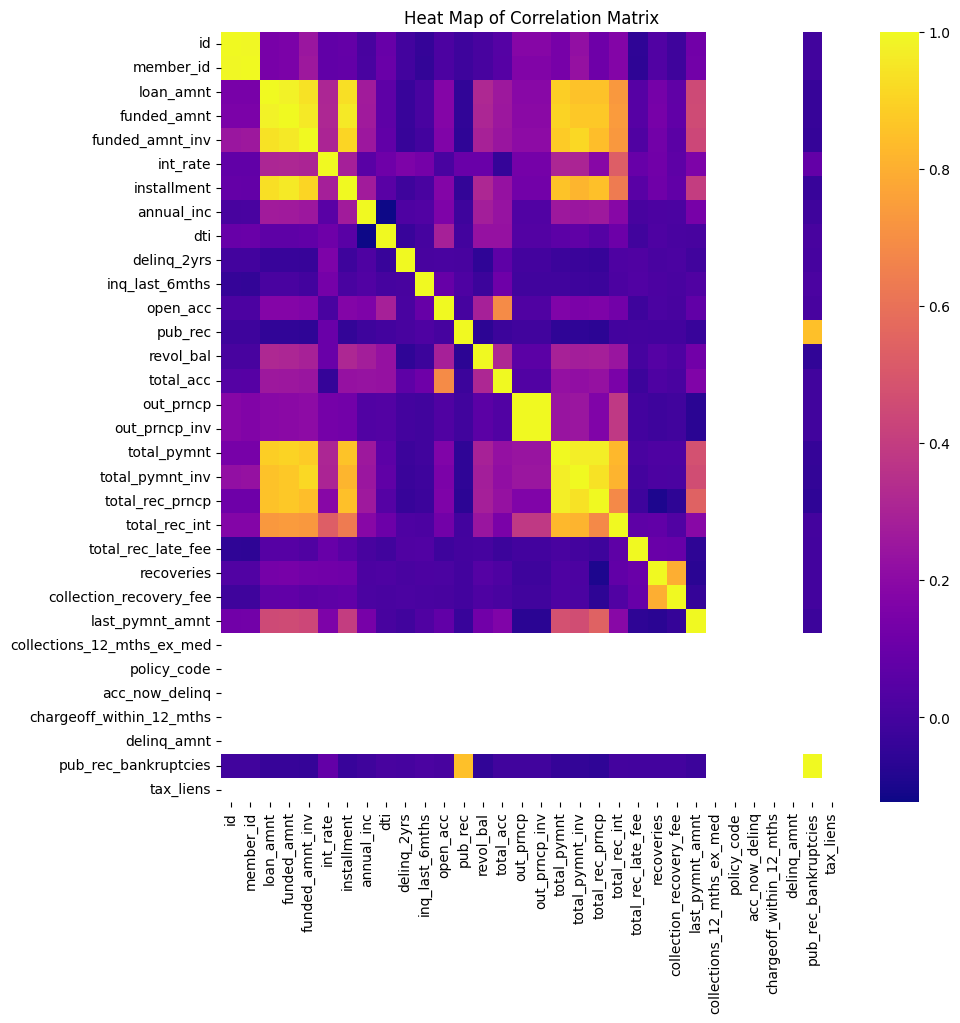

In [36]:
# Drop non-numeric columns
numeric_df = df3.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap of the cleaned correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=False, cmap='plasma')
plt.title('Heat Map of Correlation Matrix')
plt.show()

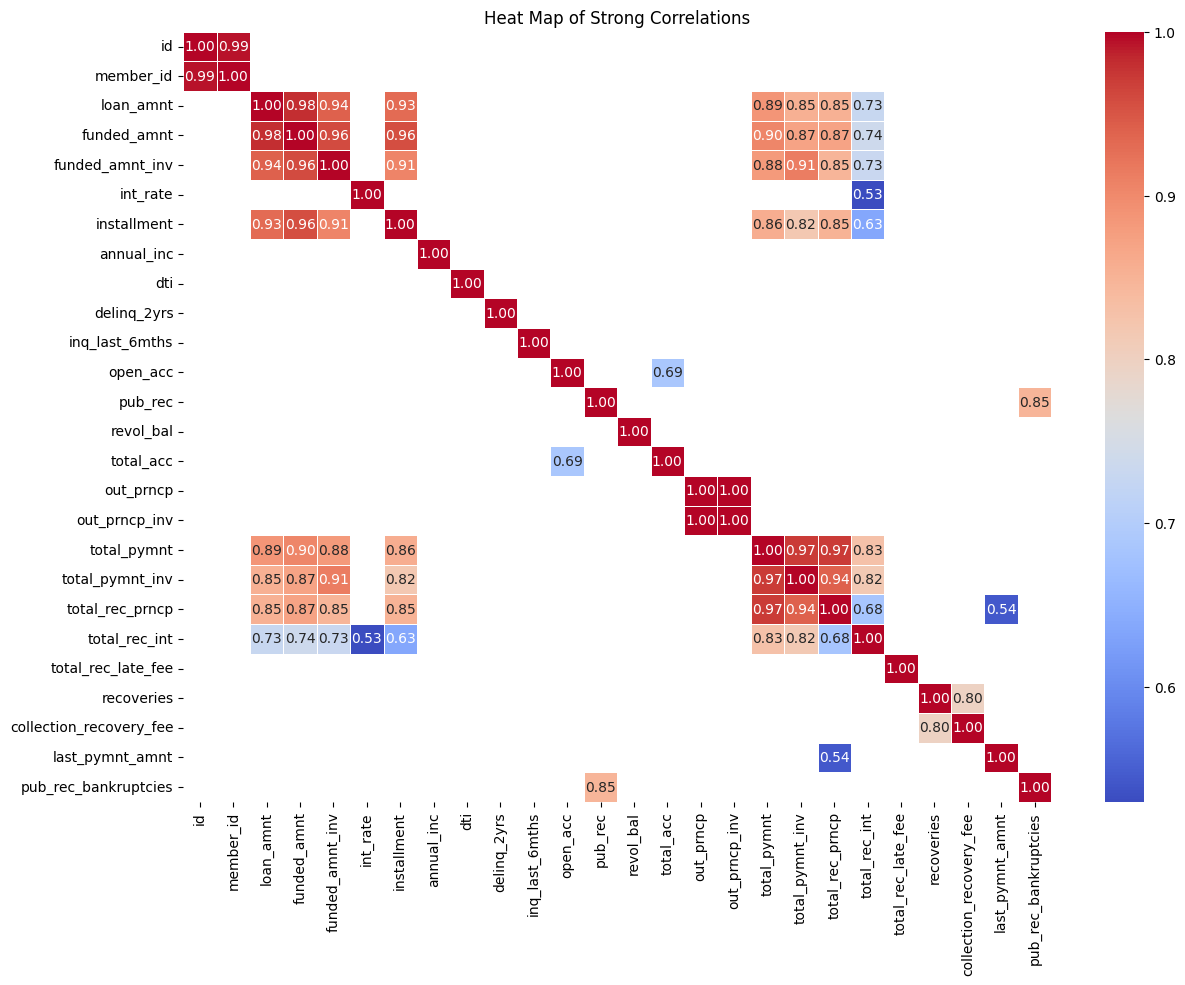

In [37]:
# Filter the correlation matrix to focus on strong correlations
threshold = 0.5
strong_corr_matrix = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Drop rows and columns where all correlations are below the threshold
strong_corr_matrix = strong_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the heatmap with strong correlations only
plt.figure(figsize=(14, 10))
sns.heatmap(strong_corr_matrix, annot=True,fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map of Strong Correlations')
plt.show()


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

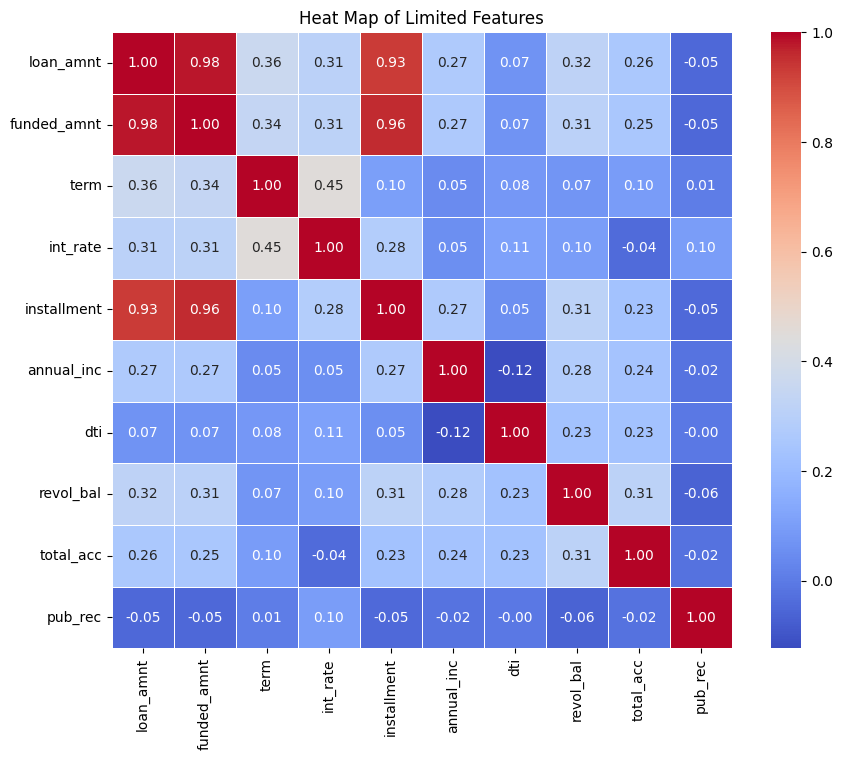

In [39]:
# Limit the number of features for the correlation matrix
# Selecting a subset of features that are more likely to be relevant or show interesting correlations
selected_features = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'pub_rec']
# Create a new correlation matrix based on the selected features
limited_corr_matrix = df3[selected_features].corr()

# Plot the heatmap with the limited number of features
plt.figure(figsize=(10, 8))
sns.heatmap(limited_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heat Map of Limited Features')
plt.show()

Imputation for missing values in the Dataset

In [40]:
# Step 1: Identify Missing Values
missing_values = df3.isnull().sum().sort_values(ascending=False)

# Filter out columns with no missing values for better focus
missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and the count of missing values
missing_values

# Imputation for Minor Missing Data

# Identify columns with less than 100 missing values
minor_missing_columns = missing_values[missing_values < 100].index

# Separate numeric and categorical columns
numeric_cols = df3[minor_missing_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df3[minor_missing_columns].select_dtypes(include=['object']).columns

# Impute numeric columns with the median
df3[numeric_cols] = df3[numeric_cols].fillna(df3[numeric_cols].median())

# Impute categorical columns with the mode
df3[categorical_cols] = df3[categorical_cols].fillna(df3[categorical_cols].mode().iloc[0])

# Verify imputation
df3[minor_missing_columns].isnull().sum()

last_pymnt_d                  0
collections_12_mths_ex_med    0
chargeoff_within_12_mths      0
revol_util                    0
tax_liens                     0
last_credit_pull_d            0
dtype: int64

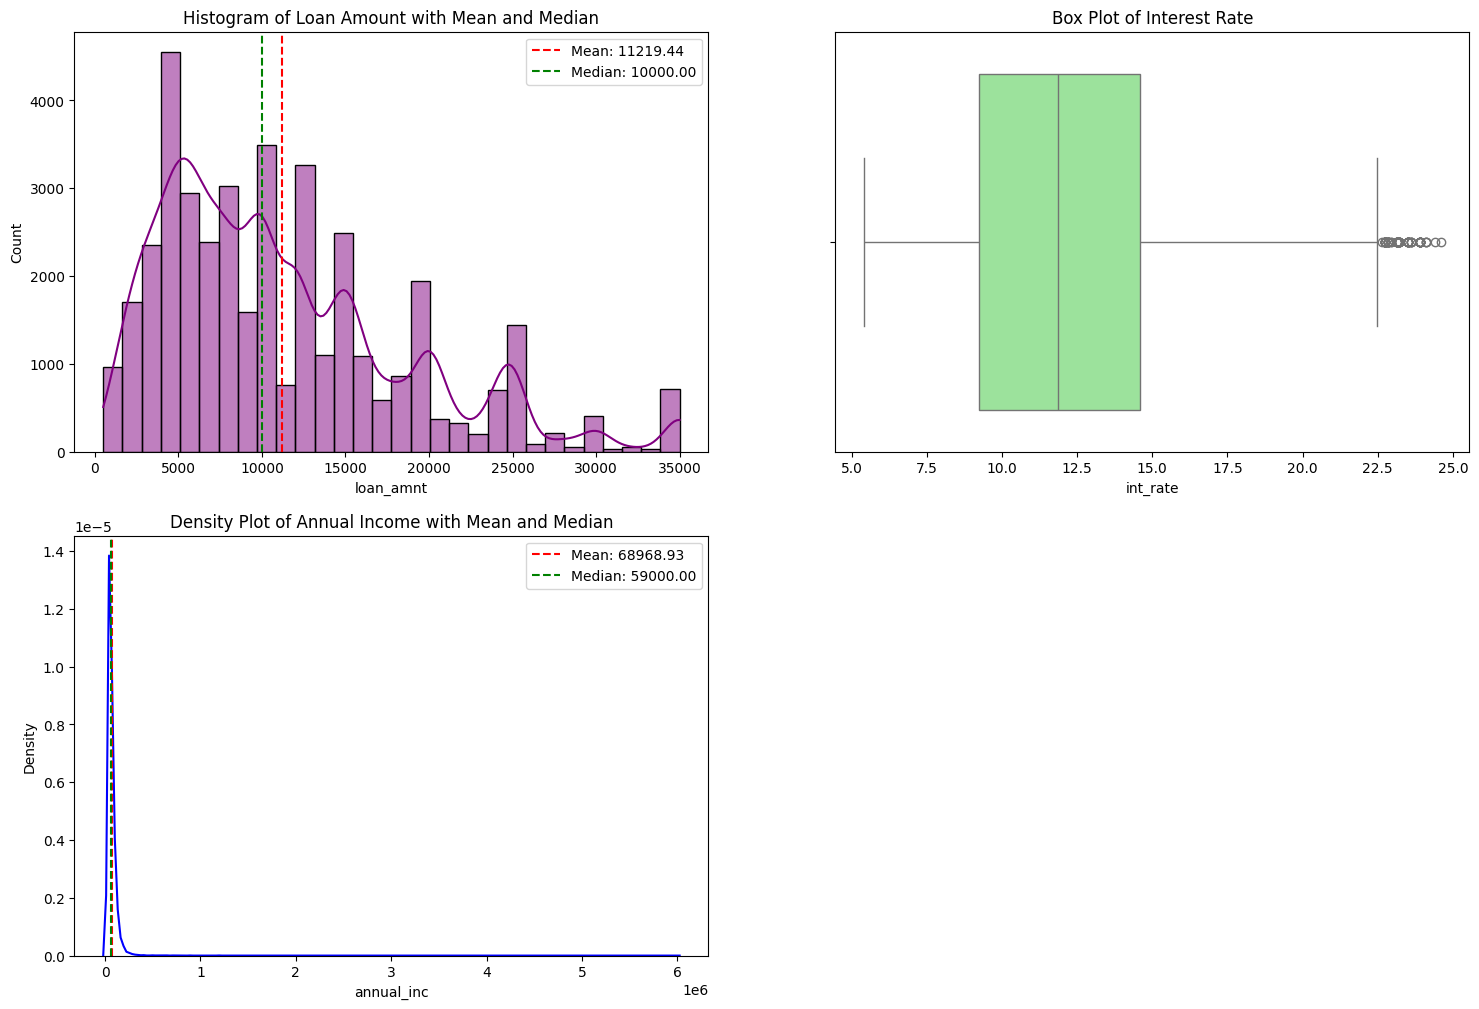

In [41]:
# Setting up the visualizations layout
plt.figure(figsize=(18, 12))

# Histogram with Mean and Median for Loan Amount
plt.subplot(2, 2, 1)
sns.histplot(df3['loan_amnt'], kde=True, color='purple', bins=30)
plt.axvline(df3['loan_amnt'].mean(), color='red', linestyle='--', label=f"Mean: {df3['loan_amnt'].mean():.2f}")
plt.axvline(df3['loan_amnt'].median(), color='green', linestyle='--', label=f"Median: {df3['loan_amnt'].median():.2f}")
plt.title('Histogram of Loan Amount with Mean and Median')
plt.legend()

# Box Plot for Interest Rate
plt.subplot(2, 2, 2)
sns.boxplot(x=df3['int_rate'], color='lightgreen')
plt.title('Box Plot of Interest Rate')

# Density Plot for Annual Income
plt.subplot(2, 2, 3)
sns.kdeplot(df3['annual_inc'].dropna(), color='blue')
plt.axvline(df3['annual_inc'].mean(), color='red', linestyle='--', label=f"Mean: {df3['annual_inc'].mean():.2f}")
plt.axvline(df3['annual_inc'].median(), color='green', linestyle='--', label=f"Median: {df3['annual_inc'].median():.2f}")
plt.title('Density Plot of Annual Income with Mean and Median')
plt.legend()


#### Distribution Shape:

The histogram shows that loan amounts are right-skewed. The majority of loans are concentrated around lower amounts, with a gradual decline in frequency as the loan amount increases. The density curve further emphasizes this skewness.

#### Mean vs. Median:

The median loan amount is 10,000.00, which is lower than the mean loan amount of 11,219.44. This difference indicates a right-skewed distribution, where the mean is pulled upwards by a few larger loan amounts (outliers) on the higher end.
The proximity of the mean and median lines, however, suggests that while the data is skewed, it is not extremely so.

#### Loan Amount Concentration:

A significant number of loans fall between 5,000 and 15,000, with a noticeable peak around the 10,000 mark, where the median line is positioned. This suggests that the most common loan amounts are around this median value.
Beyond 20,000, the frequency of loans significantly drops, indicating fewer loans with higher amounts.

#### Overall Observation:
The histogram shows a right-skewed distribution of loan amounts, with most loans concentrated around the 10,000 mark. The mean is slightly higher than the median, indicating the presence of higher-value loans that pull the average upwards. This chart highlights the tendency for the majority of loans to be in the lower to mid-range amounts, with fewer high-value loans.

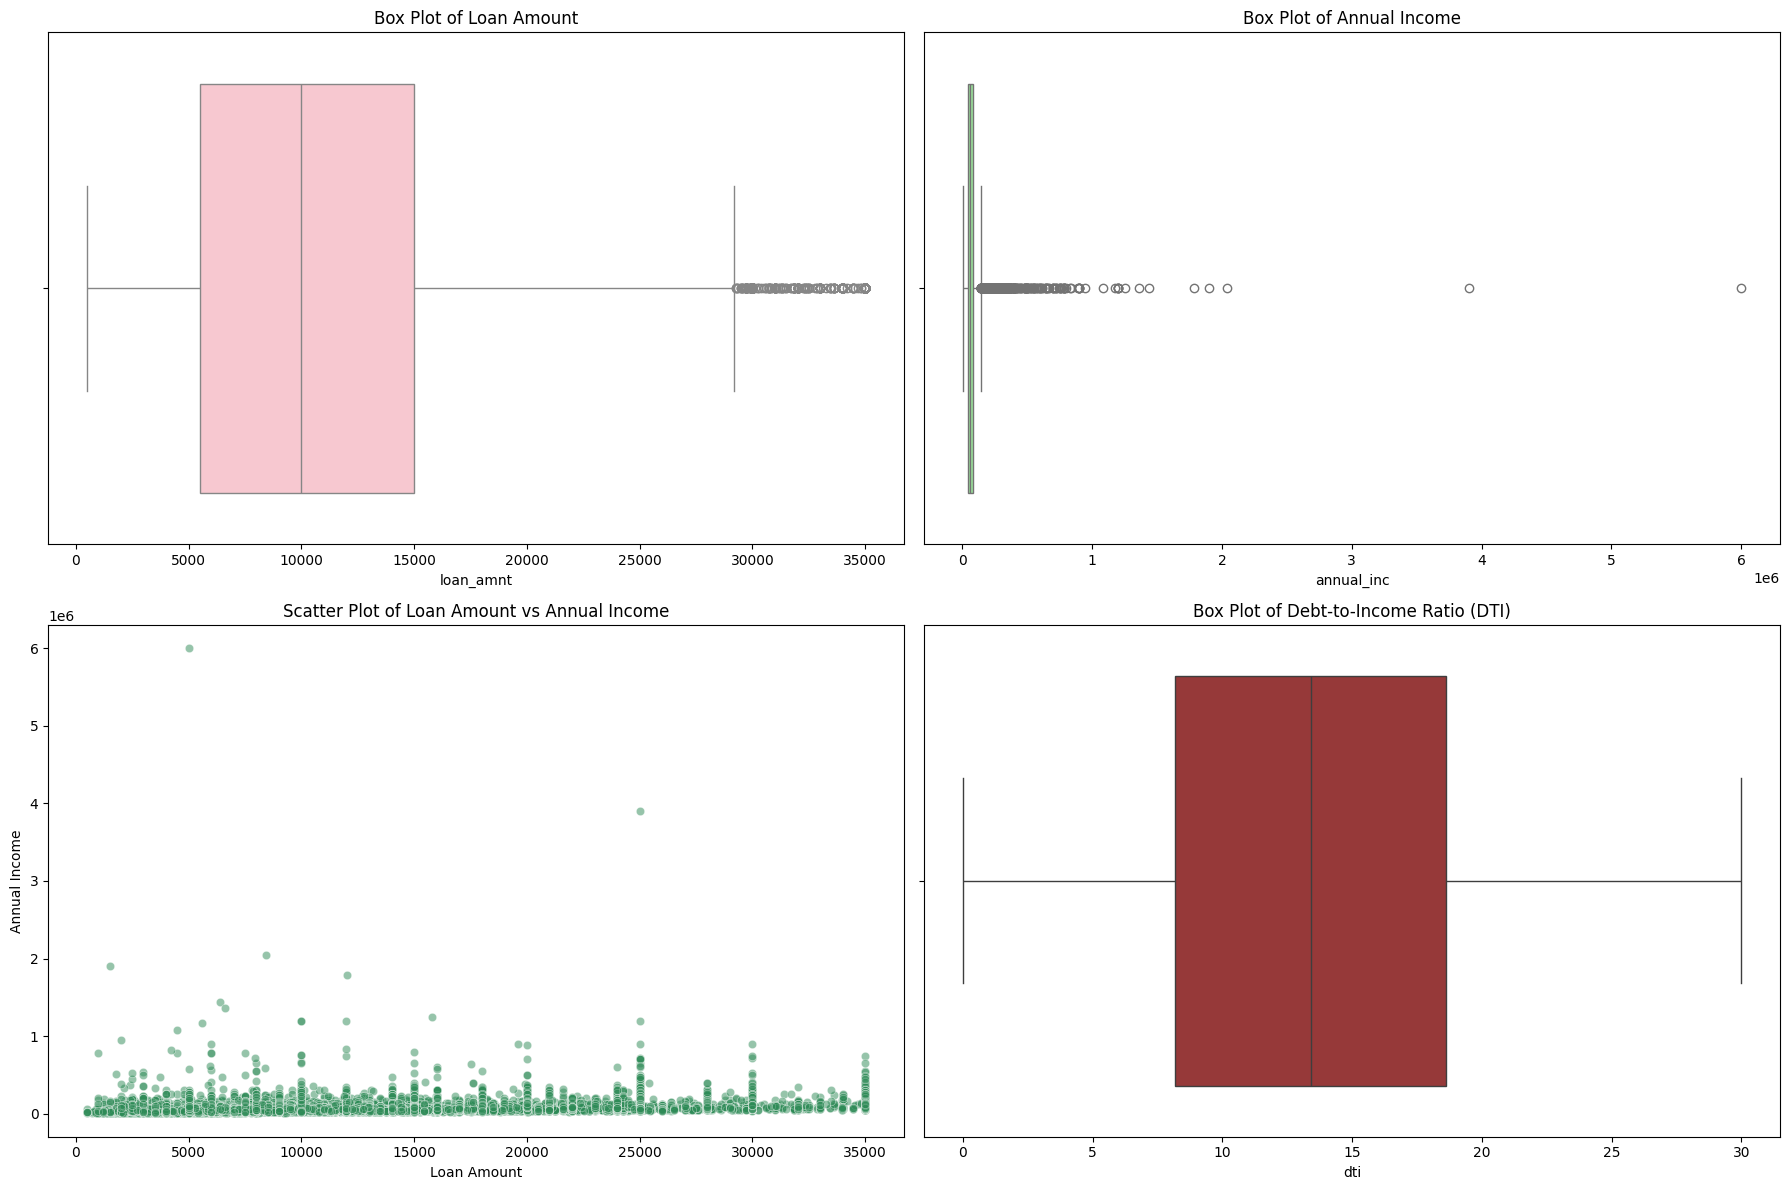

In [42]:
# Setting up the visualizations layout
plt.figure(figsize=(18, 12))

# Box Plot for Loan Amount
plt.subplot(2, 2, 1)
sns.boxplot(x=df3['loan_amnt'], color='pink')
plt.title('Box Plot of Loan Amount')

# Box Plot for Annual Income
plt.subplot(2, 2, 2)
sns.boxplot(x=df3['annual_inc'], color='lightgreen')
plt.title('Box Plot of Annual Income')

# Scatter Plot for Loan Amount vs Annual Income
plt.subplot(2, 2, 3)
sns.scatterplot(x=df3['loan_amnt'], y=df3['annual_inc'], color='seagreen', alpha=0.5)
plt.title('Scatter Plot of Loan Amount vs Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')

# Box Plot for Debt-to-Income Ratio (DTI)
plt.subplot(2, 2, 4)
sns.boxplot(x=df3['dti'], color='brown')
plt.title('Box Plot of Debt-to-Income Ratio (DTI)')

# Adjusting layout
plt.tight_layout()
plt.show()

#### Concentration of Data Points:

The majority of data points are concentrated at lower annual income levels (below 1 million) and lower loan amounts (below 20,000). This suggests that most borrowers have relatively low to moderate incomes and are taking out smaller loans.
There is a dense cluster of points near the bottom left corner of the chart, where both loan amounts and annual incomes are relatively low.

#### Spread of Data Points:

As the loan amount increases, the spread of annual incomes does not significantly increase. Most of the points remain concentrated near the lower end of the annual income spectrum, indicating that higher loan amounts are not necessarily associated with higher incomes.
There are some outliers with significantly higher incomes (above 1 million), but these are sparse and do not follow a clear pattern in relation to the loan amounts.

#### Outliers:

A few outliers are visible, where borrowers with high annual incomes (up to 6 million) are taking loans, but these are rare.
Some borrowers with very low loan amounts also appear to have high incomes, which may suggest that these individuals are taking small loans despite having a higher capacity to borrow more.

#### Relationship Between Loan Amount and Annual Income:

There is no clear linear or strong correlation between loan amount and annual income. The scatter of points across the chart indicates that loan amounts are distributed across a wide range of income levels, without a direct relationship between the two variables.
This lack of correlation suggests that loan amounts may be influenced by factors other than just annual income, such as creditworthiness, existing debt, or the purpose of the loan.

#### Overall Observation:
The scatter plot shows that most borrowers with lower incomes tend to take out smaller loans, but there is a wide range of incomes associated with various loan amounts. The lack of a clear pattern or correlation between loan amount and annual income indicates that other factors likely play a significant role in determining loan amounts. The presence of outliers with high incomes and varying loan amounts further highlights the diversity in the dataset.








C:\Users\rsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


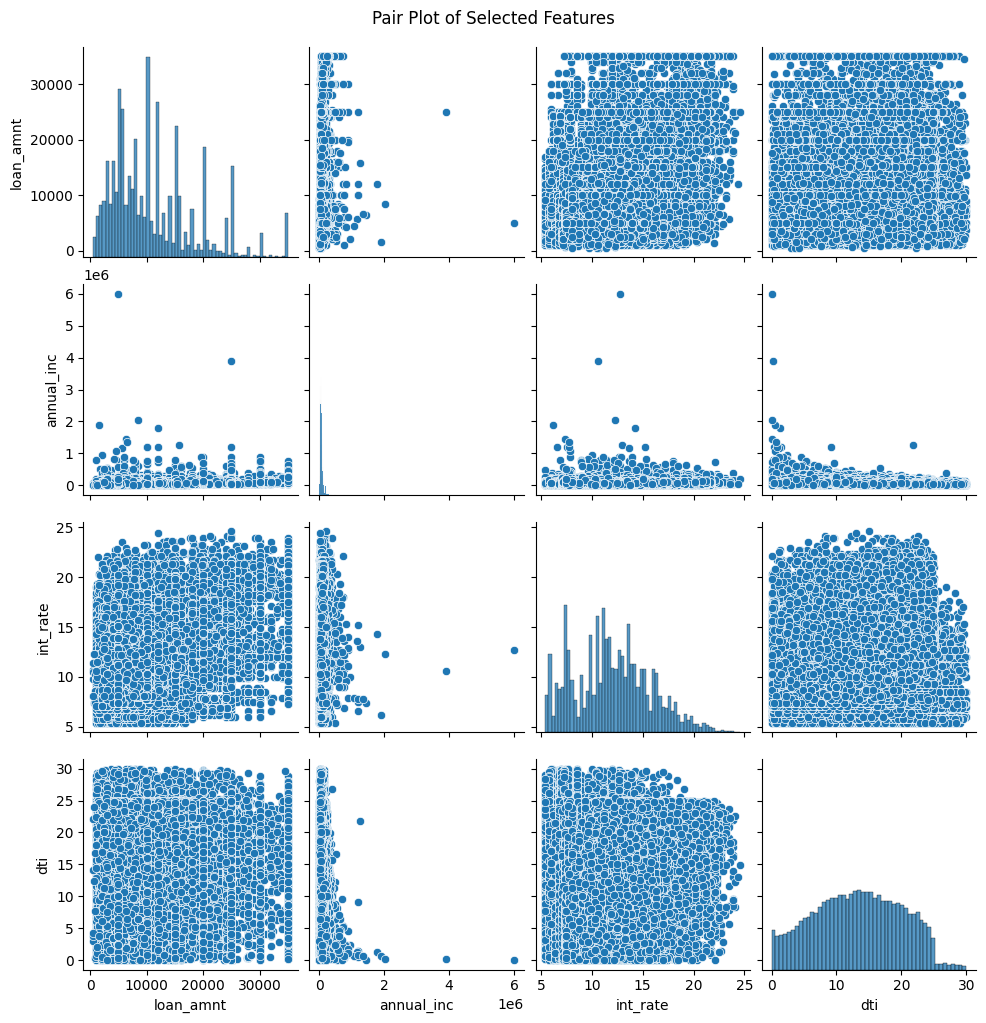

In [43]:
# Select a limited number of features for the pair plot
selected_features = ['loan_amnt', 'annual_inc', 'int_rate', 'dti']

# Create a pair plot with the selected features
sns.pairplot(df3[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


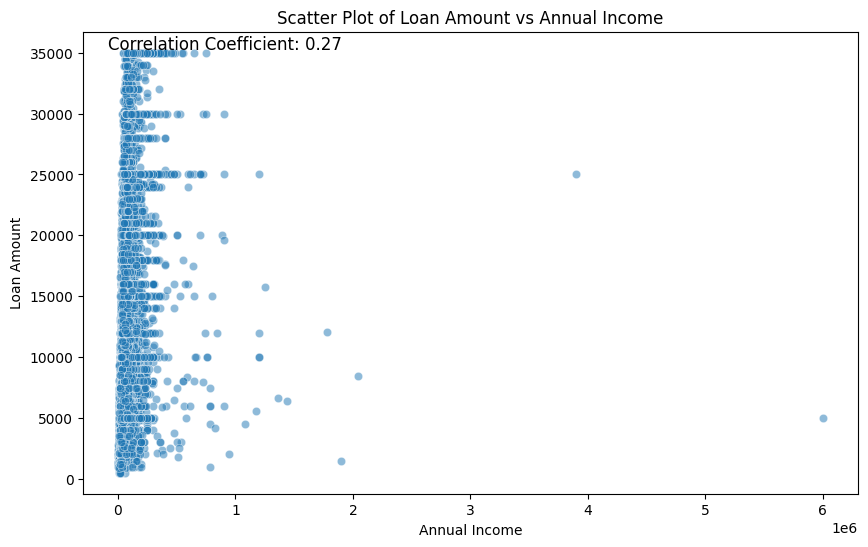

In [44]:
# Scatter plot for Loan Amount vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df3['annual_inc'], y=df3['loan_amnt'], alpha=0.5)
plt.title('Scatter Plot of Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

# Calculate the correlation coefficient
correlation = df3['annual_inc'].corr(df3['loan_amnt'])
plt.figtext(0.15, 0.85, f'Correlation Coefficient: {correlation:.2f}', fontsize=12, color='black')

plt.show()

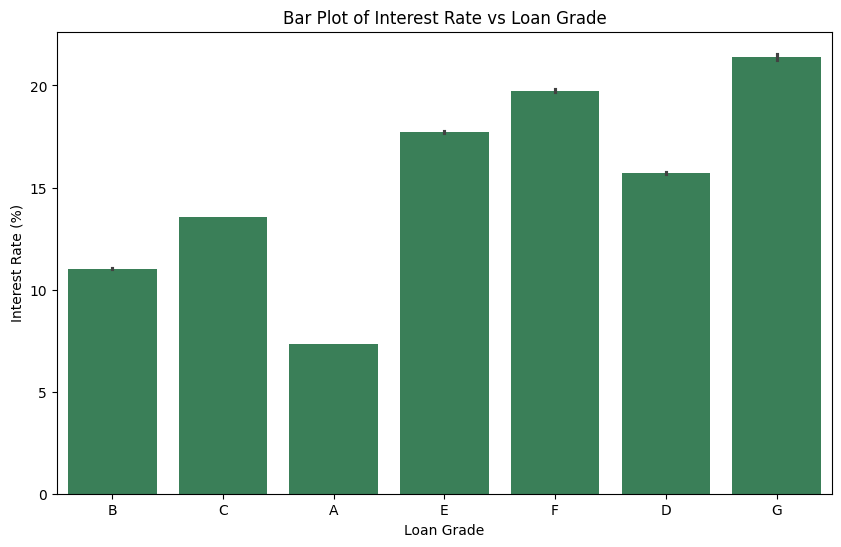

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='int_rate', data=df3, color='seagreen')
plt.title('Bar Plot of Interest Rate vs Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')

plt.show()

- Intrest rates of grade G loans are the highest.
- Intrest rates of grade A loans are the lowest.
- Intrest rate increases from A to G

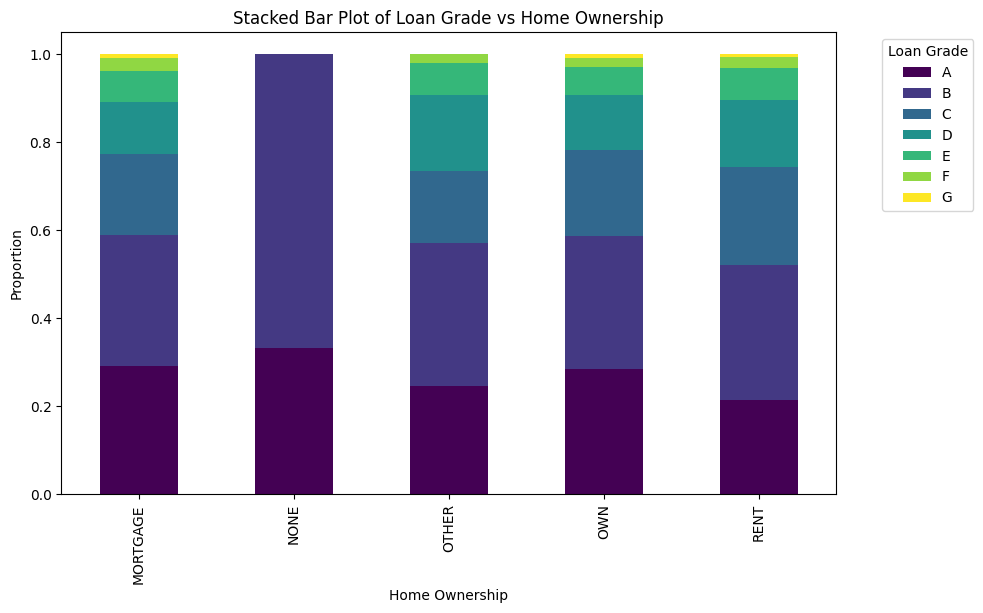

In [46]:
# Stacked Bar Plot for Loan Grade vs Home Ownership
plt.figure(figsize=(10, 6))

# Create a crosstab of the two categorical variables
crosstab = pd.crosstab(df3['home_ownership'], df3['grade'], normalize='index')

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Stacked Bar Plot of Loan Grade vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')

plt.legend(title='Loan Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

In [48]:
pivot_table = df3.pivot_table(values='loan_amnt', index='int_rate', columns='term', aggfunc='mean')

# Display the pivot table with headers
pivot_table

term,36,60
int_rate,,
5.42,6627.050611,NaN
5.79,7727.937500,8767.500000
5.99,7732.060519,NaN
6.00,7200.000000,10300.000000
6.03,8876.789709,NaN
...,...,...
23.59,NaN,19787.500000
23.91,NaN,24106.818182
24.11,NaN,23500.000000


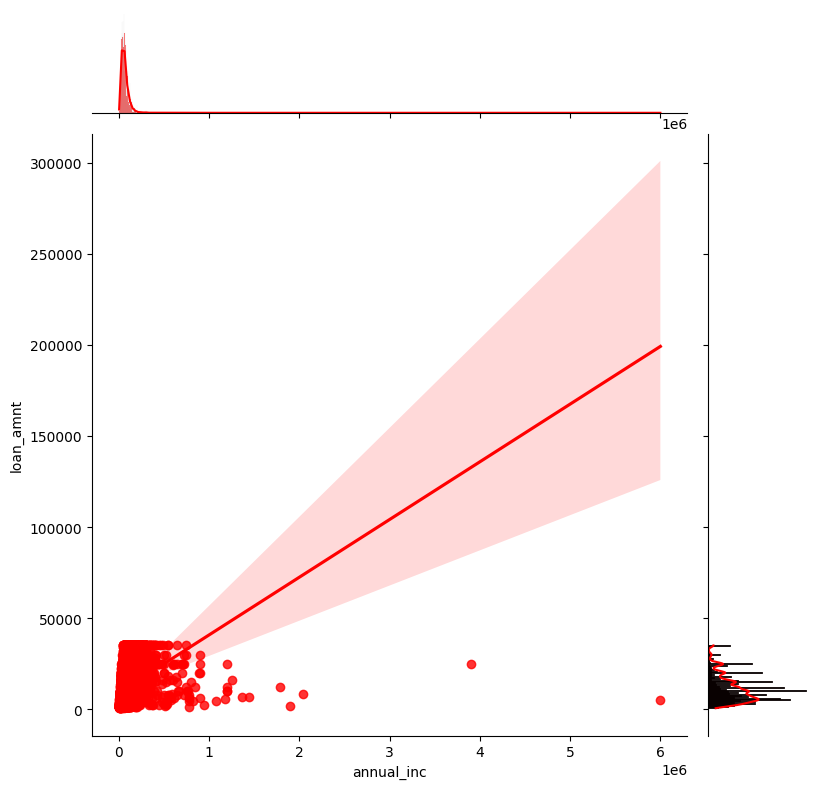

In [49]:
#joint plot of annual income and loan amount
sns.jointplot(x='annual_inc', y='loan_amnt', data=df3, kind='reg', height=8, color='r')

# Show the plot
plt.show()

##### Scatter Plot (Main Area):

- X-Axis (annual_inc): Represents the annual income, ranging from 0 to about 6 million (noted as 1e6 on the axis).
- Y-Axis (loan_amnt): Represents the loan amount, ranging from 0 to about 300,000.
Each point in the scatter plot represents an individual data point corresponding to a borrower's annual income and loan amount.

##### Linear Regression Line:

- The green line running diagonally across the scatter plot represents a linear regression line. This line shows the best fit for the relationship between annual income and loan amount.
- Shaded Area: The shaded area around the regression line represents the confidence interval. This indicates the uncertainty around the estimated relationship. A wider interval suggests more variability in the data.

##### Marginal Distributions:

- Top Plot (X-axis): A histogram showing the distribution of annual incomes across all data points. It shows that most borrowers have annual incomes clustered towards the lower end (close to 0).
- Right Plot (Y-axis): A similar plot showing the distribution of loan amounts. Most loan amounts are concentrated at the lower end, with fewer larger loans.

#### Interpretation:
##### Relationship Between Loan Amount and Annual Income:

- The scatter plot shows that there is a positive relationship between annual income and loan amount: as annual income increases, the loan amount tends to increase as well. This is evident from the upward slope of the regression line.
- However, the scatter of data points is quite dense near the lower end of both variables, indicating that most borrowers have lower incomes and take out smaller loans.

##### Confidence Interval:

The confidence interval around the regression line is relatively wide, especially as annual income increases. This suggests that there is considerable variability in the relationship between annual income and loan amount. In other words, while there is a general trend of higher income leading to higher loan amounts, it is not a very strong or consistent relationship.